In [1]:
# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

## 1. Load Dataset
- Load the `prime_indians_diabetes` dataset
- Check the first five samples. Are there any categorical features?
- Is this a classification or regression problem?
- Check the columns of the dataset

 There are  8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skinfold thickness (mm).
- 2-Hour serum insulin (mu U/ml).
- Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function.
- Age (years).
- Class variable (0 or 1).

In [2]:
df = pd.read_csv("pima_indians_diabetes.csv")
df.head()

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index([], dtype='object')

In [11]:
unique_values = df['class'].nunique()
unique_values
problem_type = "Classification"
for i in range(unique_values):
    if unique_values > 2:
        print("Regression")
        break
problem_type

'Classification'

In [12]:
target_variable = 'class'
if df[target_variable].nunique() <= 2:
    problem_type = 'Classification'
else:
    problem_type = 'Regression'
print(f"This is a {problem_type} problem.")

df.columns

This is a Classification problem.


Index(['time_pregnant_no', 'plasma_concentration', 'diastolic_blood_pressure',
       'triceps_skinfold_thickness', 'serum_insulin', 'bmi',
       'diabetes_pedigree', 'age', 'class'],
      dtype='object')

## 2. Data Preprocessing and Model
- Assign features to `X` and target variable to `y`
- Create a pipeline for preprocessing which includes imputing and standardscaling
- Create a pipeline for preprocessor and the random forest classifier. Set `n_estimators=100`
- Train the model and make your predictions on the test dataset
- List the feature importance and the corresponding features
- Create a bar plot for the feature importances
- Drop the least important feature from the data and repeat the steps above

In [14]:
X = df.drop(columns='class')
y = df['class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [16]:
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [18]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', StandardScaler())])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [19]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.75

In [20]:
feature_importances = model.named_steps['classifier'].feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
print(feature_importance_df)

                      Feature  Importance
0            time_pregnant_no    0.090802
1        plasma_concentration    0.279030
2    diastolic_blood_pressure    0.084731
3  triceps_skinfold_thickness    0.066548
4               serum_insulin    0.071515
5                         bmi    0.159337
6           diabetes_pedigree    0.123345
7                         age    0.124691


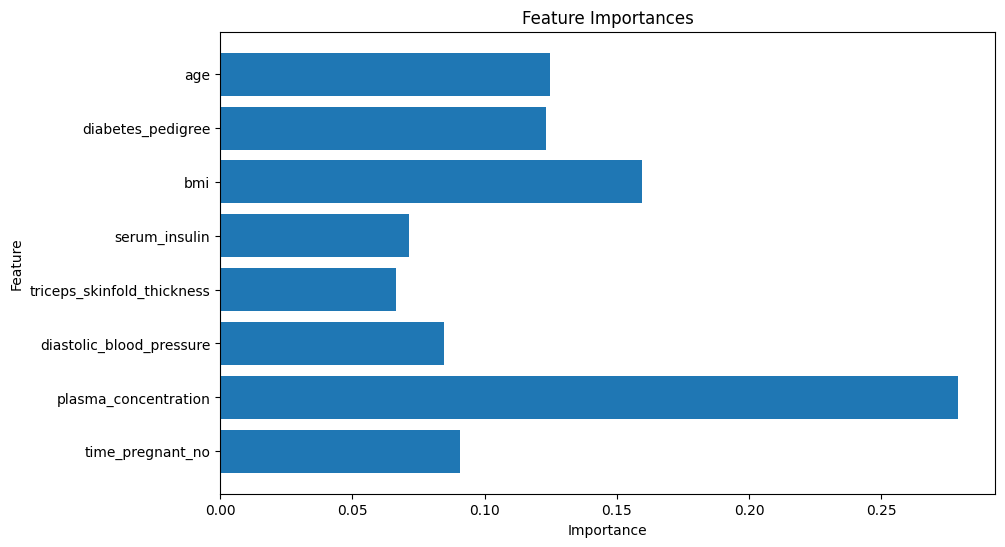

In [21]:
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [22]:
least_important_feature = feature_importance_df.sort_values(by='Importance').iloc[0]['Feature']
X_dropped = X.drop(columns=least_important_feature)

In [24]:
X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(X_dropped, y, random_state=42, stratify=y)

In [25]:
model_dropped = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [26]:
model_dropped.fit(X_train_dropped, y_train_dropped)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', StandardScaler())])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [27]:
accuracy_dropped = accuracy_score(y_test_dropped, model_dropped.predict(X_test_dropped))
print(f"Accuracy after dropping least important feature: {accuracy_dropped}")

Accuracy after dropping least important feature: 0.75


In [29]:
feature_importances_dropped = model_dropped.named_steps['classifier'].feature_importances_
features_dropped = X_dropped.columns
feature_importance_df_dropped = pd.DataFrame({'Feature': features_dropped, 'Importance': feature_importances_dropped})
feature_importance_df_dropped

,Feature,Importance
0,time_pregnant_no,0.092932
1,plasma_concentration,0.281883
2,diastolic_blood_pressure,0.095157
3,serum_insulin,0.082700
4,bmi,0.180658
5,diabetes_pedigree,0.126208
6,age,0.140462


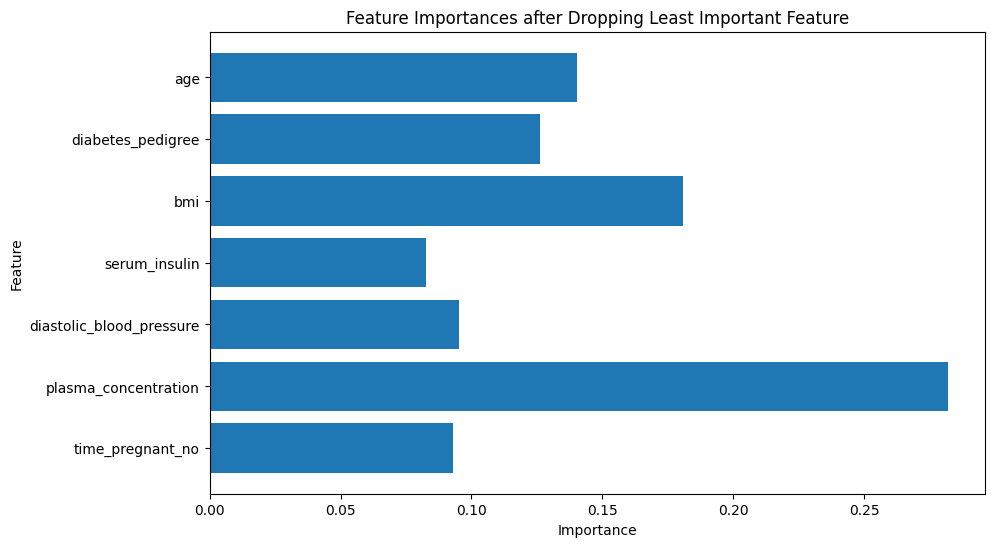

In [30]:
plt.figure(figsize=(10, 6))
plt.barh(features_dropped, feature_importances_dropped)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances after Dropping Least Important Feature')
plt.show()